# ANN from scratch 
We will be making an Artificial Neural Network without any libraries such as tensorflow and pytorch. The only library we will be using will be numpy and pandas. 

What better to learn about ANNs than to do it yourself, without using any of the fancy libraries and getting it done with just a few lines of ann.add to get a full Neural Network.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset Used
We will be using the famous MNIST dataset. Which is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.

![](./images/MnistExamplesModified.png)

__Sources__
- http://yann.lecun.com/exdb/mnist/
- https://www.wikiwand.com/en/MNIST_database
- https://www.kaggle.com/competitions/digit-recognizer/data


In [26]:
df = pd.read_csv('./datasets/train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
data = np.array(df)
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Problem Statement

We want our final product to be inputed a 28x28 image of a handwritten digit and for it to predict from 0 to 9. 

![](./images/Screenshot%202023-10-04%20182409.png)


### How are we going to tackle this problem?
Through Artificial Neural Networks! 


## What is a Artificial Neural Network?
It is a model inspried by the structure and function of neurons in the human brain. Which in our case takes in 784 pixels as our input for the first layer of our ANN and using some maths and magic, we get a output of what the machine thinks the image.

![](./images/Screenshot%202023-10-05%20150956.png)

We can think of each neuron in the network as just a number between 0 - 1. Where the neuron lights up when its value is close to 1 and remains inactive when near 0. We can represent each neuron as an activation function $a_n$ where n is the placement of the neuron along each layer. 



## MATH
Together with the connections between each neuron in the input layer and 1 neuron of the 2nd hidden layer (784 connections), we can get a formula of $w_1a_1 + w_2a_2 + w_3a_3 ... w_na_n$ where we get the weighted sum of all the activations. 

When we compute a weighted sum like this, but for this network we want the activation for the neuron to be somewhere between 0 - 1. A common thing to do is to put this weighted sum in a some function that squishes the real number into the range between 0 and 1. We will be using a sigmoid function or a RELU function to squish our formula. 

$$σ(w_1a_1 + w_2a_2 + w_3a_3 ... w_na_n)$$

What if you want for some bias for the neuron to be inactive, we'll just add in the number into the formula before we apply the sigmoid squishfycation function.

$$σ(w_1a_1 + w_2a_2 + w_3a_3 ... w_na_n + b)$$

So far each neuron from the input layer has to be connected to each neuron in the other hidden layers and then they have to be connected to the output layer, this makes our network to have a total of 13,002 total weights and bias to tweak and optimise!!

To get the math equation for the full transition of activations from 1 layer to the next. 

We organise all the activations from the first layer into a column as a vector. 
$$\begin{bmatrix} a_0(0) \\ a_1(0) \\ ... \\ a_n(0) \end{bmatrix}$$

Then organise the weights as a matrix where each row corresponds to the connections between one layer and a particular neuron in the next layer. 

$$
\begin{bmatrix} w_0,0 &  w_0,1 & \cdots & w_0,n \\ w_1,0 &  w_1,1 & \cdots & w_1,n \\ \vdots & \vdots & \ddots & \vdots \\ w_k,0 &  w_k,1 & \cdots & w_k,n \end{bmatrix}
\begin{bmatrix} a_0(0) \\ a_1(0) \\ \vdots \\ a_n(0) \end{bmatrix} = 
\begin{bmatrix} ? \\ ? \\ \vdots \\ ? \end{bmatrix}
$$
Where we get the product of each neuron

Next we add the bias, where we organise it into a vector and adding it to our matrix vector product.
$$
\begin{bmatrix} w_0,0 &  w_0,1 & \cdots & w_0,n \\ w_1,0 &  w_1,1 & \cdots & w_1,n \\ \vdots & \vdots & \ddots & \vdots \\ w_k,0 &  w_k,1 & \cdots & w_k,n \end{bmatrix}
\begin{bmatrix} a_0(0) \\ a_1(0) \\ \vdots \\ a_n(0) \end{bmatrix} + 
\begin{bmatrix} b_0 \\ b_1 \\ \vdots \\ b_n \end{bmatrix}
$$

Finally we squish each component from our result
$$
σ\left(
\begin{bmatrix} w_0,0 &  w_0,1 & \cdots & w_0,n \\ w_1,0 &  w_1,1 & \cdots & w_1,n \\ \vdots & \vdots & \ddots & \vdots \\ w_k,0 &  w_k,1 & \cdots & w_k,n \end{bmatrix}
\begin{bmatrix} a_0(0) \\ a_1(0) \\ \vdots \\ a_n(0) \end{bmatrix} + 
\begin{bmatrix} b_0 \\ b_1 \\ \vdots \\ b_n \end{bmatrix}
\right)
$$

We can represent this formula with the matrixs as their own symbols 
$$
a(1) = σ(Wa(0) + b)
$$

## How does the Network learn? and the MORE Math
To understand how a neural network learns, let's dive deeper into the concepts of cost functions, gradient descent, and backpropagation.

### Cost Function
So how do we know how bad or good our model is performing on a given dataset? We use a cost function, which is a mathematical function that measures how well or poorly a neural network is performing on the data. In our case we add up the squares of the differences between the unwanted output activations and the value we want them to have in the output layer. 

For example, we will be using a picture of 3 as our input. The ANN spits out trash outputs but we want it to predict a 3. 
$$
(0.43 - 0.00)^2 +(0.23 - 0.00)^2 +(0.54 - 0.00)^2 +\color{green}{(0.88 - 1.00)^2} \color{white}+(0.54 - 0.00)^2 +(0.02 - 0.00)^2 +(0.25 - 0.00)^2 +(0.12 - 0.00)^2 +(0.77 - 0.00)^2 +(0.63 - 0.00)^2
$$
We get a result of 2.3002. This higher the cost function the shitter the model is, with 0 being the perfect prediction.
### Gradient Descent
But just knowing how shit the model is, isnt very helpful. We need to tell it how to change the weights and bias so that it gets better aka reduce the cost function. Thats where gradient descent comes in.

The idea of gradient descent is to eventually minimize the cost function by taking calculated steps in the direction of the gradient.
![](./images/gradientdescent.png)
[Source](https://sebastianraschka.com/faq/docs/gradient-optimization.html)

We first take the derititive(gradient) of our cost function $C()$ and when it is positve we move to the left and right if it is negative. And if we do this repeatly at each step checking the gradient and taking the right step, we will eventually reach a local minimum of the function. We can think of it as a ball rolling down the hill. However unlike our example above, there can be many local minimums in a function and depending on where we start it can converge into different local minimums.

If we make our step size __propotional__ to the gradient calculated, we will take big steps when the gradient is nowhere close to 0 and much smaller and careful steps when it is nearing the local minimum.
$$\theta_{i+1} = \theta_i - \alpha \nabla J(\theta_i)$$
- $\theta_i$ represents the current values of the parameters (weights or coefficients).
- $\alpha$ is the learning rate, which determines the step size or how much you adjust the parameters in each iteration.
- $\nabla J(\theta_i)$ represents the gradient of the cost function with respect to the parameters at the current point \theta_i.

### Back Propagation
Back propagation is the process using gradient descent and using it to minimize the cost function, by updating our 13,002 weights and bias of the neural network. The goal is to understand how a change in each weight and bias impacts the cost function.

As it names suggest, we move backwards in the neural network, looking first at the output of our network. The main idea is to find each desired changes to the weights and bias that best fit our data.

The main steps are:
- __Backward Pass__: The gradient of the cost function is calculated with respect to each parameter in the neural network. This is typically done using the chain rule of calculus(we will get to it later). The gradients indicate how much the cost function would change if the parameters were adjusted slightly or how important each parameter is to the overall cost function.

- __Weight and Bias Updates__: The gradients calculated in the backward pass are used to update the weights and biases of the neural network. The parameters are adjusted in the __opposite direction__ of the gradient to minimize the cost. The learning rate is a hyperparameter that determines the size of the step taken during each update.



### Backpropagation math

Lets begin by having a simple neural network where each layer has a single neuron on it

![](./images/Screenshot%202023-10-13%20155200.png)

This simple network has 3 weights and 3 bias, and our goal is the understand how __senstitve__ the cost function is to these variables. 
$$C(w_1,b_1,w_2,b_2,w_3,b_3)$$

In that way we know which adjustments to the variables is going to cause the most efficient decrease to the cost function.

First we look at the connection between the last 2 neurons,lets label the last neuron $a^{(L)}$, indicating the layer that is in and the 2nd last neuron $a^{(L-1)}$

![](./images/Screenshot%202023-10-13%20160730.png)

Lets say the value we want this last activation to be for a given traning example is $\color{yellow}y$. 

![](./images/Screenshot%202023-10-13%20162053.png)

The cost $C_0(...)$ of this for a single training exmaple is $(a^L-\color{yellow}y)^2$. For example $(0.66-1.00)^2$

Remeber that our activation is equals to the weight times the activation of the previous layer plus the bias with a function to squish it in between 0 and 1, we can write it such that $\color{gray}a^{(L)} = σ(\color{blue}w^{(L)}a^{(L-1)} + \color{purple}b^{(L)})$

It will be easier if give a special name to the weighted sum like $z^{(L)}$ with the same superscript as the relevant activations.:
$$\color{green}z^{(L)} = \color{blue}w^{(L)}a^{(L-1)} + \color{purple}b^{(L)}$$
$$\color{gray}a^{(L)} = \color{green}z^{(L)}$$

A way to visualize this is to visualize it to a flow chart. Where the weight, previous activation and bias are all used to compute $z^{(L)}$, which in turn lets us compute $a^{(L)}$, and lastly with the constant $y$ lets us compute the cost:

![](./images/Screenshot%202023-10-13%20163800.png)

And $a^{(L)}$ is also influenced by its own weights and bias from the previous layer

![](./images/Screenshot%202023-10-13%20165255.png)
But lets ignore $a^{(L)}$ for now

Our first small goal is to understand how sensitive the cost function $\color{red}C_0$ is to small changes in our weight $\color{blue}w^{(L)}$. Or in other words what the derivative of $\color{red}C_0(...)$ with respect to $\color{blue}w^{(L)}$. What we want is the ratio, the nudge to $\color{blue}w^{(L)}$ causes some nudge to $\color{green}z^{(L)}$, which in turn changes $\color{gray}a^{(L)}$, which directly influences the cost $\color{red}C_0$

So we break it up by looking first at the ratio of a change to $\color{green}z^{(L)}$ to the change in $\color{blue}w^{(L)}$. Which is the derivative of $\color{green}z^{(L)}$ with respect to $\color{blue}w^{(L)}$. Then we consider the chage of $a^{(L)}$ to the change in $\color{green}z^{(L)}$ as well as the final change in $\color{red}C_0$ and $\color{gray}a^{(L)}$.

$$
\frac{\color{red}C_0}{\color{blue}w^{(L)}} = \frac{\color{green}z^{(L)}}{\color{blue}w^{(L)}} \cdot \frac{\color{gray}a^{(L)}}{\color{green}z^{(L)}} \cdot \frac{\color{red}C_0}{\color{gray}a^{(L)}}
$$

This formula here is the chain rule!

The final result will be:
$$
\frac{\color{red}C_0}{\color{blue}w^{(L)}} = \frac{\color{green}z^{(L)}}{\color{blue}w^{(L)}} \cdot \frac{\color{gray}a^{(L)}}{\color{green}z^{(L)}} \cdot \frac{\color{red}C_0}{\color{gray}a^{(L)}} = a^{(L-1)}σ'(z^{L})2(a^{(L)}-y)
$$

However this is only the derivative with respect to $\color{blue}w^{(L)}$ to the cost of a single training example, as the cost function requries us to average throughout all the training examples. We need to take the average of all the derivatives of each training example :
$$
\frac{\color{red}C}{\color{blue}w^{(L)}} = \frac{1}{N} \sum_{i=1}^{N} \frac{\color{red}C_k}{\color{blue}w^{(L)}}
$$

From our final result, we already have 50% of the work done! If we want to find how does $\color{purple}b^{(L)}$ change in respect to $\color{red}C_0$, we can just replace $\color{blue}w^{(L)}$ with $\color{purple}b^{(L)}$. And our result will be:
$$
\frac{\color{red}C_0}{\color{purple}b^{(L)}} = \frac{\color{green}z^{(L)}}{\color{purple}b^{(L)}} \cdot \frac{\color{gray}a^{(L)}}{\color{green}z^{(L)}} \cdot \frac{\color{red}C_0}{\color{gray}a^{(L)}} = 1σ'(z^{L})2(a^{(L)}-y)
$$

Also this is the idea where propagating backwards comes in, we can see how sensitve the cost function is the to previous activation layer $a^{(L-1)}$
$$
\frac{\color{red}C_0}{a^{(L-1)}} = \frac{\color{green}z^{(L)}}{a^{(L-1)}} \cdot \frac{\color{gray}a^{(L)}}{\color{green}z^{(L)}} \cdot \frac{\color{red}C_0}{\color{gray}a^{(L)}} = \color{blue}w^{(L)}\color{white}σ'(z^{L})2(a^{(L)}-y)
$$
Because now we can just kepp iterating the chain rule backwards to see how sensitve the cost function is to the previous weights and bias!

#### How about a network with multiple neurons in a single layer?
It is actually not that complicated, there are just a few more indices to keep track of. Rather than a layer having the label $a^{(L)}$ we are also going to have a subscript indicating which neuron of that layer it is. Lets use the letter $k$ to index the layer $a^{(L-1)}$ and $j$ to index the layer $a^{(L)}$

Similiarly to find the cost function we add up the sum of our desired outputs.$\color{red}C_0 = \color{white}\sum_{j=1}^{n_L-1} (a_j^{(L)}- y_j)^2$ 

The chain rule equation is essentially the same, but with different indicies:
$$
\frac{\color{red}C_0}{\color{blue}w_{jk}^{(L)}} = \frac{\color{green}z_{j}^{(L)}}{\color{blue}w_{jk}^{(L)}} \cdot \frac{\color{gray}a_{j}^{(L)}}{\color{green}z_{j}^{(L)}} \cdot \frac{\color{red}C_0}{\color{gray}a_{j}^{(L)}}
$$
where the weight connecting the $a_{k}^{(L-1)}$ neuron and $a_{j}^{(L)}$ is $\color{blue}w_{jk}^{(L)}$

What changes is the derivatives of the cost with respect to the one of the activations of the previous layer. The difference is that the activation of the neuron influences the cost function through mulitple different paths. So we need to find the sum of the derivatives of layer L:
$$
\frac{\color{red}C_0}{a_{k}^{(L-1)}} = \sum_{j=1}^{n_L-1} \frac{\color{green}z_{j}^{(L)}}{a_{k}^{(L-1)}} \cdot \frac{\color{gray}a_{j}^{(L)}}{\color{green}z_{j}^{(L)}} \cdot \frac{\color{red}C_0}{\color{gray}a_{j}^{(L)}}
$$
Once we know how sensitve the cost function is, we can just repeat it with the rest of th weights and bias throughout the layer. 

We are done!

## Code

In [28]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
data = np.array(df)
m ,n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_test = data_dev[0]
X_test = data_dev[1:n]
X_test = X_test / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape
Y_train

array([1, 7, 3, ..., 7, 9, 9], dtype=int64)

In [30]:
print(np.random.rand(16,1))

[[0.66027894]
 [0.01005863]
 [0.81304457]
 [0.88117994]
 [0.4909961 ]
 [0.13907007]
 [0.31744639]
 [0.8805313 ]
 [0.40954356]
 [0.16036111]
 [0.36745745]
 [0.80598813]
 [0.50109548]
 [0.30685676]
 [0.23146081]
 [0.36680524]]


In [31]:
def inital_params():
    w1 = np.random.randn(16, 784)
    b1 = np.random.randn(16, 1)
    w2 = np.random.randn(16, 16)
    b2 = np.random.randn(16, 1)
    w3 = np.random.randn(10, 16)
    b3 = np.random.randn(10, 1)

    return w1, b1, w2, b2, w3, b3

def ReLu(z):
    return np.maximum(z, 0)

def d_ReLu(z):
    return z > 0

# def leaky_relu(z, alpha=0.01):
#     return np.where(z > 0, z, alpha * z)

# def d_leaky_relu(z, alpha=0.01):
#     return np.where(z > 0, 1, alpha)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def d_sigmoid(z):
    return sigmoid(z) * (1 - sigmoid(z))

def tanh(z):
    return np.tanh(z)

def d_tanh(z):
    return 1 - np.power(tanh(z), 2)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_propagation(w1, b1, w2, b2, w3, b3, X):
    z1 = w1.dot(X) + b1
    a1 = sigmoid(z1)
    z2 = w2.dot(a1) + b2
    a2 = sigmoid(z2)
    z3 = w3.dot(a2) + b3
    a3 = softmax(z3)

    return z1, a1, z2, a2, z3, a3

def encode_y(y):
    y_encode = np.zeros((y.size, y.max()+1))
    y_encode[np.arange(y.size), y] = 1
    y_encode = y_encode.T

    return y_encode


def back_propagation(z1,a1,z2,a2,z3,a3,w3,w2,X, Y):
    # Get Y in one-hot encoding
    y_encode = encode_y(Y)
    m = Y.size
    dZ3 = a3 - y_encode
    dW3 = (1/m) * dZ3.dot(a2.T)
    db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)
    dZ2 = np.dot(w3.T, dZ3) * d_sigmoid(z2)
    dW2 = (1/m) * dZ2.dot(a1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(w2.T, dZ2) * d_sigmoid(z1)
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2, dW3, db3

def update_params(w1, b1, w2, b2, w3, b3, dW1, db1, dW2, db2, dW3, db3, learning_rate):
    w1 = w1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    w3 = w3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3
    return w1, b1, w2, b2, w3, b3



In [32]:
def get_predictions(a3):
    return np.argmax(a3, 0)

def get_accuracy(predictions, y):
    return np.sum(predictions == y)/y.size

def gradient_descent(X,Y,iter,learning_rate):
    w1, b1, w2, b2, w3, b3 = inital_params()
    for i in range(iter):
        z1, a1, z2, a2, z3, a3 = forward_propagation(w1, b1, w2, b2, w3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = back_propagation(z1,a1,z2,a2,z3,a3,w3,w2,X, Y)
        w1, b1, w2, b2, w3, b3 = update_params(w1, b1, w2, b2, w3, b3, dW1, db1, dW2, db2, dW3, db3, learning_rate)
        if i % 100 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(a3)
            print(get_accuracy(predictions, Y))
    return w1, b1, w2, b2, w3, b3

## Final Result

In [33]:
W1 , B1, W2, B2, W3, B3 = gradient_descent(X_train, Y_train, 2000, 0.75)

Iteration:  0
0.10621951219512195
Iteration:  100
0.5109512195121951
Iteration:  200
0.6492926829268293
Iteration:  300
0.7189512195121951
Iteration:  400
0.7609512195121951
Iteration:  500
0.7884878048780488
Iteration:  600
0.8093902439024391
Iteration:  700
0.8253658536585365
Iteration:  800
0.8384634146341463
Iteration:  900
0.8482682926829268
Iteration:  1000
0.8557317073170732
Iteration:  1100
0.8630243902439024
Iteration:  1200
0.8692682926829268
Iteration:  1300
0.8748780487804878
Iteration:  1400
0.879
Iteration:  1500
0.8834390243902439
Iteration:  1600
0.8867073170731707
Iteration:  1700
0.8896341463414634
Iteration:  1800
0.8928536585365854
Iteration:  1900
0.8951707317073171


### Predictions

In [34]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _,_,A3 = forward_propagation(W1, b1, W2, b2, W3,b3,X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


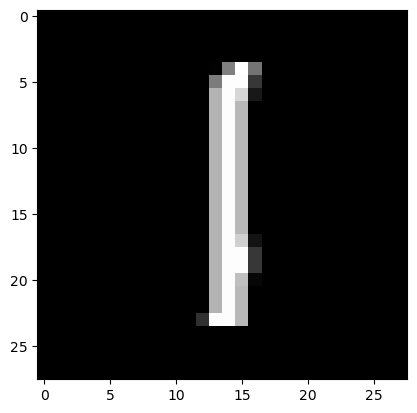

Prediction:  [7]
Label:  7


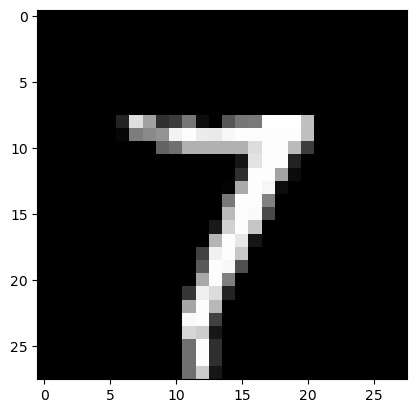

Prediction:  [3]
Label:  3


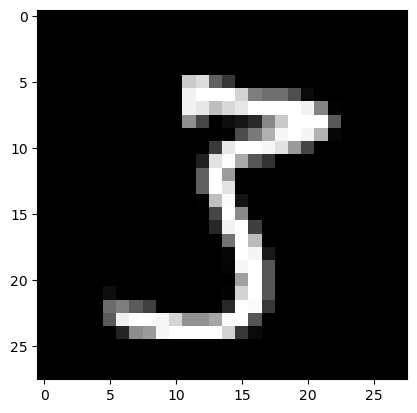

Prediction:  [1]
Label:  1


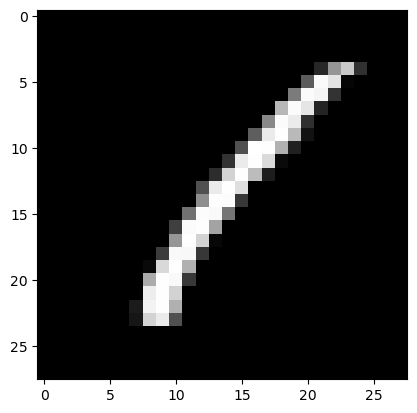

In [35]:
test_prediction(0, W1, B1, W2, B2, W3, B3)
test_prediction(1, W1, B1, W2, B2, W3, B3)
test_prediction(2, W1, B1, W2, B2, W3, B3)
test_prediction(3, W1, B1, W2, B2, W3, B3)

### Predictions on test set

In [36]:
dev_predictions = make_predictions(X_test, W1, B1, W2, B2, W3, B3)
get_accuracy(dev_predictions, Y_test)

0.874

## Credits
- https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&ab_channel=3Blue1Brown